In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
bank=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/Logestic Regression/bank-full.csv')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.shape

(45211, 17)

In [6]:
bank=bank.dropna()

In [7]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

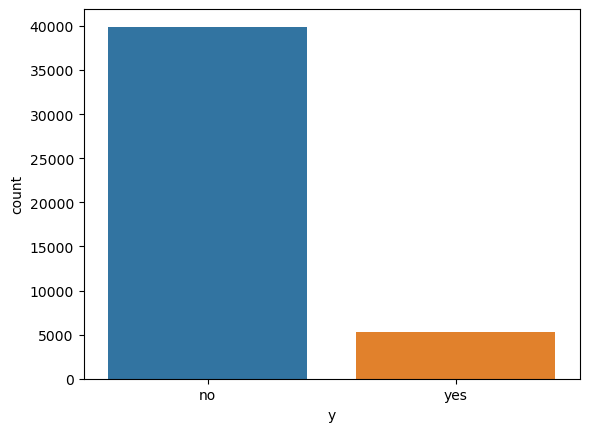

In [9]:
import seaborn as sns
sns.countplot(x="y",data=bank)

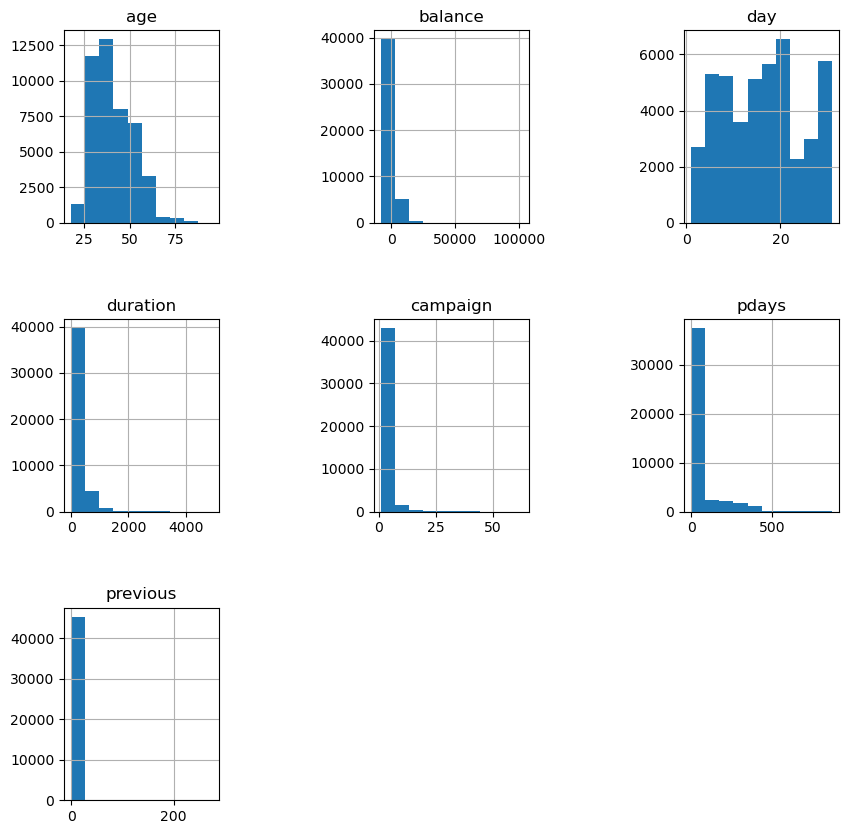

In [10]:
import matplotlib.pyplot as plt
headers=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
bank.hist(column=headers,figsize=(10,10))
plt.subplots_adjust(wspace=1,hspace=0.5)
plt.show()

In [11]:
bank['default']=bank['default'].map({'yes':1,'no':0})
bank['housing']=bank['housing'].map({'yes':1,'no':0})
bank['loan']=bank['loan'].map({'yes':1,'no':0})
bank['contact']=bank['contact'].map({'cellular':1,'telephone':2,'unknown':0})
bank['poutcome']=bank['poutcome'].map({'sucess':1,'others':2,'unknown':0})

In [12]:
nominal=['job','marital','education','month']
dummies=pd.get_dummies(data=bank,columns=nominal)
dummies['y']=dummies['y'].map({'yes':1,'no':0})
dummies.head()

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,0,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,0,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,0,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,0,5,92,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,0,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
dummies.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [14]:
bank=dummies

In [15]:
bank

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,0,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,0,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,0,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,0,5,92,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,0,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,1,17,977,3,-1,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,1,17,456,2,-1,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,1,17,1127,5,184,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,2,17,508,4,-1,...,0,0,0,0,0,0,0,1,0,0


In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  int64  
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   contact              45211 non-null  int64  
 6   day                  45211 non-null  int64  
 7   duration             45211 non-null  int64  
 8   campaign             45211 non-null  int64  
 9   pdays                45211 non-null  int64  
 10  previous             45211 non-null  int64  
 11  poutcome             36959 non-null  float64
 12  y                    45211 non-null  int64  
 13  job_admin.           45211 non-null  uint8  
 14  job_blue-collar      45211 non-null  uint8  
 15  job_entrepreneur     45211 non-null 

In [17]:
bank.isnull().sum()

age                       0
default                   0
balance                   0
housing                   0
loan                      0
contact                   0
day                       0
duration                  0
campaign                  0
pdays                     0
previous                  0
poutcome               8252
y                         0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
education_unknown         0
month_apr                 0
month_aug                 0
month_dec                 0
month_feb           

In [18]:
poutcome=bank['poutcome']
poutcome.mean(),poutcome.median(),poutcome.mode()

(0.0,
 0.0,
 0    0.0
 Name: poutcome, dtype: float64)

In [19]:
import numpy as np
bank['poutcome']=np.where(bank['poutcome']<=poutcome.mean(),0,1)

In [20]:
bank['poutcome'].isnull().sum()

0

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   contact              45211 non-null  int64
 6   day                  45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  poutcome             45211 non-null  int32
 12  y                    45211 non-null  int64
 13  job_admin.           45211 non-null  uint8
 14  job_blue-collar      45211 non-null  uint8
 15  job_entrepreneur     45211 non-null  uint8
 16  job_housemaid        4

In [22]:
bank

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,0,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,0,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,0,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,0,5,92,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,0,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,1,17,977,3,-1,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,1,17,456,2,-1,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,1,17,1127,5,184,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,2,17,508,4,-1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
X=bank.drop('y',axis=1).values
Y=bank['y'].values

## SPLITTING DATA INTO TRAIN AND TEST DATA

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=10)

## LOGISTIC REGRESSION and FITTING THE MODEL

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [28]:
y_pred=classifier.predict(X)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## COMPARING THE ACTUALL Y AND PREDICTED Y VALUES 

In [30]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_y':y_pred})

In [31]:
y_pred_df

,actual,predicted_y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,0
45209,0,0


## CONFUSION MATRIX 

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix=confusion_matrix(Y,y_pred)

In [34]:
confusion_matrix

array([[39173,   749],
       [ 4247,  1042]], dtype=int64)

## CLASSIFICATION REPORT

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



# ROC CURVE

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [37]:
fpr,tpr,threshold=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)

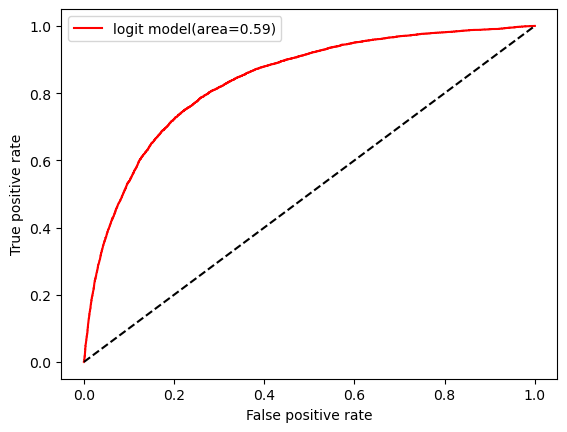

In [38]:
plt.plot(fpr,tpr,color='r',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [39]:
import statsmodels.api as sm
sm.Logit(Y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.251608
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45171
Method:                           MLE   Df Model:                           39
Date:                Wed, 01 Feb 2023   Pseudo R-squ.:                  0.3028
Time:                        19:13:43   Log-Likelihood:                -11375.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0032      0.002     -1.510      0.131      -0.007       0.001
x2            -0.0432      0.162     -0.267      0.789      -0.360       0.273
x3          1.252e-05   4.99e-06      2.511      0.012    2.75e-06    2.23e-05
x4            -0.7768      0.043    -18.249      0.000      -0.860      -0.693
x5            -0.4935      0.059     -8.400      0.000      -0.609      -0.378
x6             0.6886      0.044     15.593      0.000       0.602       0.775
x7             0.0072      0.002      3.020      0.003       0.003       0.012
x8             0.0042   6.34e-05     65.699      0.000       0.004       0.004
x9            -0.1099      0.010    -10.865      0.000      -0.130      -0.090
x10           -0.0020      0.000     -7.072      0.000      -0.003      -0.001
x11            0.0054      0.006      0.927      0.354      -0.006       0.017
x12            1.3899      0.073     19.004      0.000       1.247       1.533
x13           -0.1662        nan        nan        nan         nan         nan
x14           -0.5170        nan        nan        nan         nan         nan
x15           -0.6026        nan        nan        nan         nan         nan
x16           -0.7482        nan        nan        nan         nan         nan
x17           -0.3623        nan        nan        nan         nan         nan
x18            0.0506        nan        nan        nan         nan         nan
x19           -0.5090        nan        nan        nan         nan         nan
x20           -0.4087        nan        nan        nan         nan         nan
x21            0.1719        nan        nan        nan         nan         nan
x22           -0.3525        nan        nan        nan         nan         nan
x23           -0.2985        nan        nan        nan         nan         nan
x24           -0.5892        nan        nan        nan         nan         nan
x25           -1.4116        nan        nan        nan         nan         nan
x26           -1.5999        nan        nan        nan         nan         nan
x27           -1.3200        nan        nan        nan         nan         nan
x28           -1.3234        nan        nan        nan         nan         nan
x29           -1.0998        nan        nan        nan         nan         nan
x30           -0.8445        nan        nan        nan         nan         nan
x31           -1.0639        nan        nan        nan         nan         nan
x32           -0.3680        nan        nan        nan         nan         nan
x33           -0.8841        nan        nan        nan         nan         nan
x34            0.4205        nan        nan        nan         nan         nan
x35           -0.5557        nan        nan        nan         nan         nan
x36           -1.5978        nan        nan        nan         nan         nan
x37           -1.0442        nan        nan        nan         nan         nan
x38           -0.3406        nan        nan        nan         nan         nan
x3